##     VIRUSSHARE 80:20 split
Deleted pattern    : @System@@@Z  
'API_Data_Adware': 0.05, 'API_Data_Agent': 0.05, 'API_Data_Backdoor': 0.05, 'API_Data_Downloader': 0.09, 'API_Data_Ransomware': 0.05, 'API_Data_Trojan': 0.05, 'API_Data_Virus': 0.05, 'API_Data_Worms': 0.1

In [1]:
import time
import pickle
import pandas as pd 
import numpy as np
from gensim.models import Word2Vec
import gensim
from matplotlib import pyplot as plt
import plotly.graph_objects as go
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn import preprocessing,naive_bayes, pipeline, manifold 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
import seaborn as sns
import re
import nltk
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer

2024-10-07 17:26:23.724362: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-07 17:26:23.726455: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-07 17:26:23.730934: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-07 17:26:23.742715: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-07 17:26:23.760349: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [2]:
#plotname=Malware_Original_VIRUSSAMPLE plotname.split("_")[0] is Malware plotname.split("_")[1] is Original
def API_LENGTH_DISTRIBUTION_PLOT(plotname,Full_Text_name):
    #Count no of API calls in each row
    record_length=[]
    for row in Full_Text_name:
        text=row
        x=len(text.split( ))
        record_length.append(x)
    print("Number of APIS in Longest Sequence is:", max(record_length))
    print("Number of APIS in Shortest Sequence is:", min(record_length))
    Max_Len=max(record_length)
    Min_Len=min(record_length)
    #Counter names to be understood from the respective comment
    #Counter names to be understood from the respective comment
    cnt_0=0
    cnt_1_19=0
    cnt_20_39=0
    cnt_40_59=0
    cnt_60_79=0
    cnt_80_99=0
    cnt_100_149=0
    cnt_150_199=0
    cnt_200_249=0
    cnt_250_299=0
    morethan_300=0
    for x in record_length:
        if x==0:
            cnt_0=cnt_0+1
        elif x<20:
            cnt_1_19=cnt_1_19+1
        elif x<40:
            cnt_20_39=cnt_20_39+1
        elif x<60:
            cnt_40_59=cnt_40_59+1
        elif x<80:
            cnt_60_79 =cnt_60_79+1
        elif x<100:
            cnt_80_99=cnt_80_99+1
        elif x<150:
            cnt_100_149=cnt_100_149+1
        elif x<200:
            cnt_150_199=cnt_150_199+1
        elif x<250:
            cnt_200_249=cnt_200_249+1
        elif x<300:
            cnt_250_299=cnt_250_299+1
        else:
            morethan_300=morethan_300+1

    #print(cnt_0," ",cnt_20," ",cnt_40," ",cnt_60," ",cnt_80," ",cnt_100," ",cnt_120," ",cnt_121)
    # creating the data for plot
    data = {'=0':cnt_0,'>0 and <20':cnt_1_19, '>=20 & <40':cnt_20_39, '>=40 & <60':cnt_40_59,
        '>=60 & <80':cnt_60_79, '>=80 & <100':cnt_80_99, '>=100 & <150':cnt_100_149,
        '>=150 & <200':cnt_150_199,'>=200 & <250':cnt_200_249,'>=250 & <300':cnt_250_299,'>=300':morethan_300 }
    y = list(data.keys())
    x = list(data.values())

    # Plot horizontal bar chart
    plt.figure(figsize = (14, 4))
    bars = plt.barh(y,x)
    # To get data labels
    for  bar in bars:
        width = bar.get_width()
        label_y = bar.get_y() + bar.get_height() / 2
        plt.text(width, label_y, s=f'{width}')

    # Define axes labels    Sample plotname: Malware_VirusSample_DupRemoved
    plt.xlabel("No. of "+plotname.split("_")[0]+" samples in the range")
    plt.ylabel("API Sequence Length \n in "+plotname.split("_")[1]+" Dataset ")
    # Display a bar chart

    #plt.show()
    plot_fname="API_Length_Distribution"+str(plotname)+".eps"
    plt.savefig(plot_fname,format='eps',dpi=1000)
    return Max_Len,Min_Len

In [3]:
#START Of Method to remove duplicate API   For each distinct API Keep First Occurance and delete all others
def remove_duplicate(api_text):
    return ' '.join(dict.fromkeys(api_text.split()))

In [4]:
API_Data_all=pd.DataFrame()
API_Data_all=pd.read_csv('VirusShare_treated.csv')
API_Data_all.shape

(14616, 4)

In [5]:
API_Data_all.rename(columns={'file_hash': 'hashcode', 'api': 'API_Sequence','class': 'MalwareType'}, inplace=True)

In [6]:
#API_Data = API_Data_all.loc[API_Data_all['MalwareType'].isin(['Trojan','Virus','Backdoor','Worms','Adware','Spyware','Downloader','Agent','Ransomware'])]
API_Data = API_Data_all.loc[API_Data_all['MalwareType'].isin(['Trojan','Virus','Adware','Backdoor','Downloader','Worms','Agent','Ransomware'])]
API_Data=API_Data.reset_index(drop=True)

In [7]:
API_Data.head(5)

Unnamed: 0                                         file  \
0           0  VirusShare_2e7933c0ba7c97d4d033d8b8b93085b1   
1           1  VirusShare_3771ba787329c060a1b9977727f0fb7c   
2           2  VirusShare_813dc4da16cfca90ab7f76d890caaf43   
3           3  VirusShare_89ac6e1ae159d55989628715b29aaf0b   
4           4  VirusShare_de1079a3a4070016591541571c2babc4   

                                        API_Sequence MalwareType  
0  wfopen feof fscanf controlfp excepthandler3 se...      Trojan  
1                                         CorExeMain      Trojan  
2  AccessibleObjectFromWindow InterlockedIncremen...      Trojan  
3  CompareFileTime SearchPathA GetShortPathNameA ...      Trojan  
4  LoadLibraryA GetProcAddress VirtualProtect Vir...      Trojan

In [8]:
MalwareLabel=preprocessing.LabelEncoder()
API_Data['MalwareTypeId']=MalwareLabel.fit_transform(API_Data['MalwareType'])

In [9]:
Full_Text_org=API_Data['API_Sequence']
Full_Text_org.shape

(13849,)

In [10]:
Full_Text_org

0        wfopen feof fscanf controlfp excepthandler3 se...
1                                               CorExeMain
2        AccessibleObjectFromWindow InterlockedIncremen...
3        CompareFileTime SearchPathA GetShortPathNameA ...
4        LoadLibraryA GetProcAddress VirtualProtect Vir...
                               ...                        
13844    Sleep GetCurrentProcess FlushInstructionCache ...
13845    InterlockedIncrement DeleteCriticalSection Ini...
13846    InitializeCriticalSectionAndSpinCount LocalAll...
13847                                           CorExeMain
13848    WNetDisconnectDialog WNetCancelConnection2A WN...
Name: API_Sequence, Length: 13849, dtype: object

Number of APIS in Longest Sequence is: 890
Number of APIS in Shortest Sequence is: 1


(890, 1)

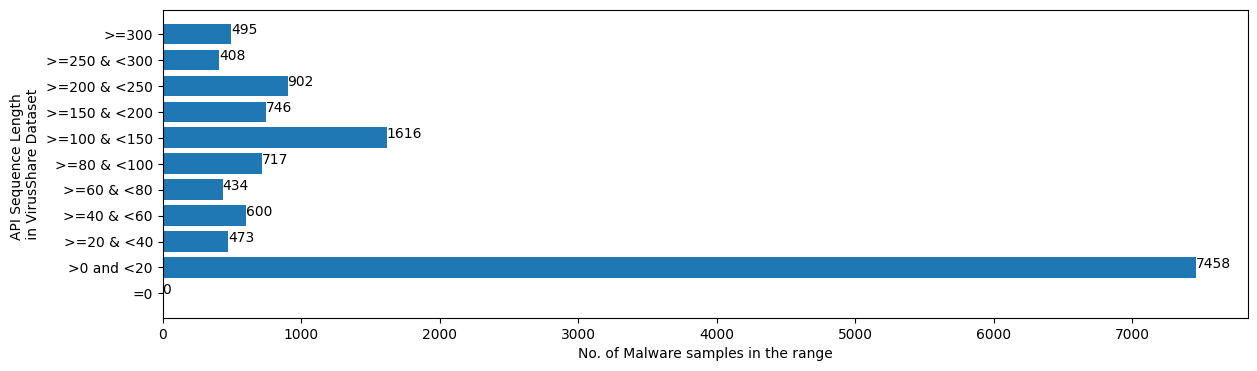

In [11]:
API_LENGTH_DISTRIBUTION_PLOT("Malware_VirusShare_Original",Full_Text_org)

In [12]:
Full_Text_org_Dup_Removed=Full_Text_org.apply(remove_duplicate)
#Full_Text_org_Dup_Removed=Full_Text_org
Full_Text_org_Dup_Removed.shape

(13849,)

Number of APIS in Longest Sequence is: 889
Number of APIS in Shortest Sequence is: 1


(889, 1)

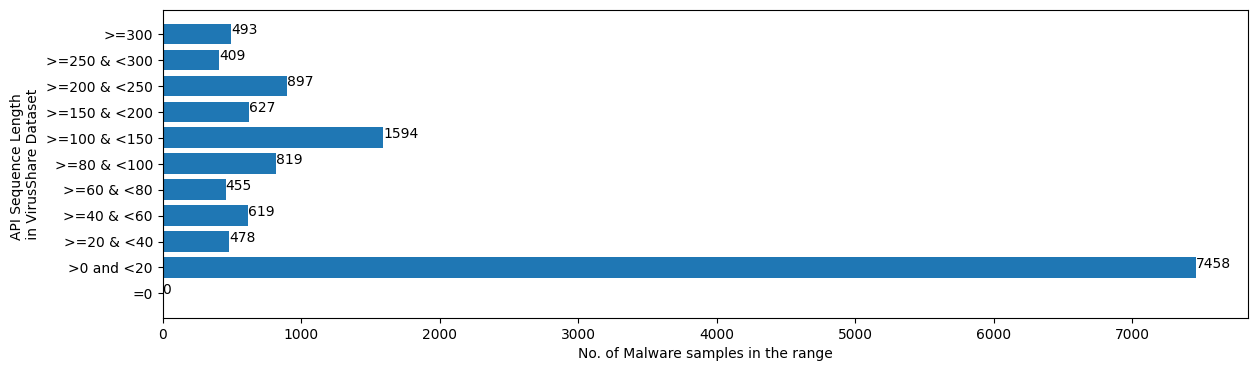

In [13]:
API_LENGTH_DISTRIBUTION_PLOT("Malware_VirusShare_DupRemoved",Full_Text_org_Dup_Removed)

In [14]:
#count how many records in each class
for x in API_Data.MalwareType.unique():
    print (x, len(API_Data[API_Data.MalwareType==x]))
#for x in API_Data_all.MalwareTypeId.unique():
#    print (x, len(API_Data_all[API_Data_all.MalwareTypeId==x]))


Trojan 8919
Virus 2490
Adware 908
Backdoor 510
Downloader 218
Agent 165
Ransomware 115
Worms 524
